In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from env import get_db_url

In [2]:
from pydataset import data

# Part 1
Use the iris database to answer the following quesitons:

In [3]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 1
What does the distribution of petal lengths look like?

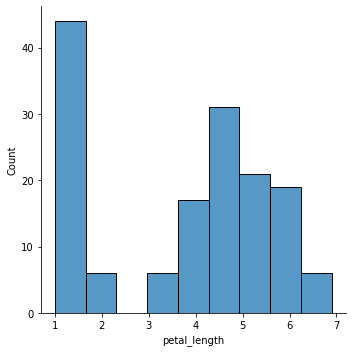

In [107]:
sns.displot(iris.petal_length);

### 2
Is there a correlation between petal length and petal width?

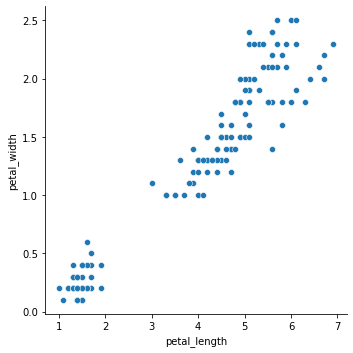

In [5]:
sns.relplot(x = 'petal_length', y = 'petal_width', data = iris);

There does appear to be a fairly strong correlation between petal length and petal width.

### 3
Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.

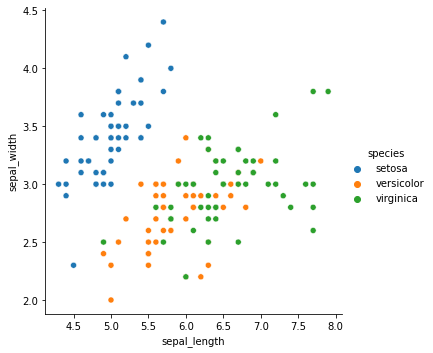

In [6]:
sns.relplot(x = 'sepal_length', y = 'sepal_width', hue = 'species', data = iris);

A shorter sepal length paired with a wider sepal width does appear to be indicative of the species setosa. Although there is some distinction between versicolor and virginica, there is not enough distinction to indicate that sepal length and width can predict either species except in the case of outliers.

### 4
Which features would be best used to predict species?

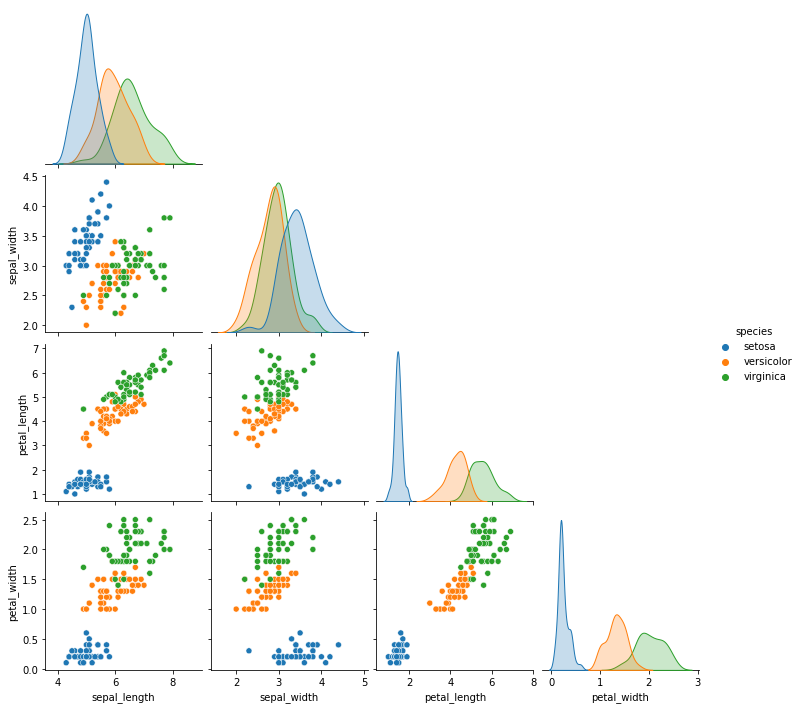

In [108]:
sns.pairplot(data = iris, hue = 'species', corner = True);

Petal length and petal width appear to provide the best distinction between versicolor and virginica as compared to any other combination of features. Predicting the species setosa is fairly simple given any combination of features.

# Part 2

### 1
Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

In [8]:
anscombe = sns.load_dataset('anscombe')
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [9]:
anscombe.groupby('dataset').describe().T

dataset          I         II        III         IV
x count  11.000000  11.000000  11.000000  11.000000
  mean    9.000000   9.000000   9.000000   9.000000
  std     3.316625   3.316625   3.316625   3.316625
  min     4.000000   4.000000   4.000000   8.000000
  25%     6.500000   6.500000   6.500000   8.000000
  50%     9.000000   9.000000   9.000000   8.000000
  75%    11.500000  11.500000  11.500000   8.000000
  max    14.000000  14.000000  14.000000  19.000000
y count  11.000000  11.000000  11.000000  11.000000
  mean    7.500909   7.500909   7.500000   7.500909
  std     2.031568   2.031657   2.030424   2.030579
  min     4.260000   3.100000   5.390000   5.250000
  25%     6.315000   6.695000   6.250000   6.170000
  50%     7.580000   8.140000   7.110000   7.040000
  75%     8.570000   8.950000   7.980000   8.190000
  max    10.840000   9.260000  12.740000  12.500000

Each dataset has the same average x and y, and the same standard deviation for x and y.

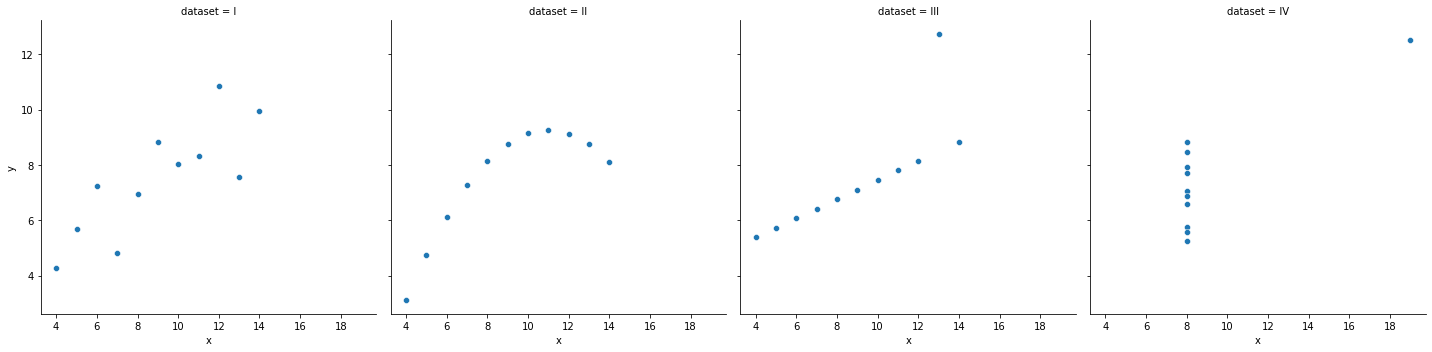

In [10]:
sns.relplot(data = anscombe, x = 'x', y = 'y', col = 'dataset');

### 2
Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [11]:
insect_sprays = data('InsectSprays')
insect_sprays.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


In [12]:
data('InsectSprays', show_doc = True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

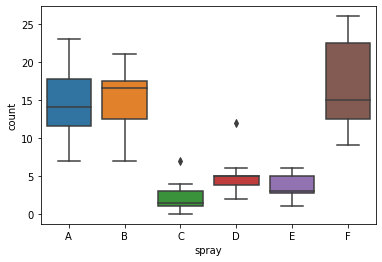

In [109]:
sns.boxplot(data = insect_sprays, y = 'count', x = 'spray');

### 3
Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:

In [14]:
swiss = data('swiss')
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


- Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [15]:
is_catholic = swiss.Catholic > 50.0
swiss['is_catholic'] = is_catholic
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


- Does whether or not a province is Catholic influence fertility?

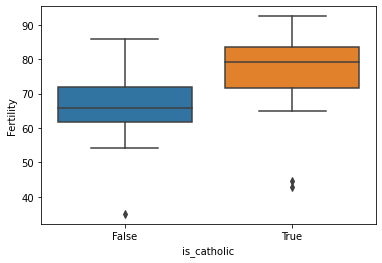

In [16]:
sns.boxplot(data = swiss, y = 'Fertility', x = 'is_catholic');

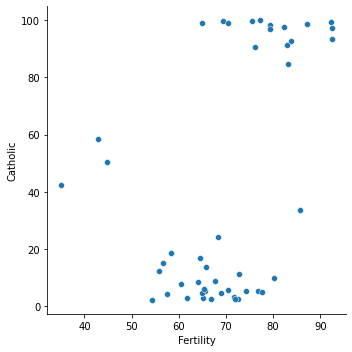

In [17]:
sns.relplot(data = swiss, x = 'Fertility', y = 'Catholic');

There is a weak correlation between fertility and whether or not a province is catholic. Catholic provinces do tend to have higher fertility rates in general.

- What measure correlates most strongly with fertility?

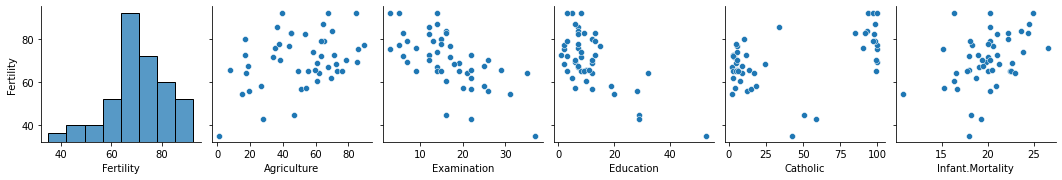

In [28]:
sns.pairplot(swiss.drop(columns = ['is_catholic']), y_vars = 'Fertility');

In [110]:
swiss.corr().Fertility

Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
is_catholic         0.402813
Name: Fertility, dtype: float64

Both education and examination have strong negative correlations with fertility.

### 4
Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [22]:
sql = '''
SELECT
    item_name,
    SUM(quantity) AS count,
    ROUND(SUM(CAST(SUBSTR(item_price, 2) AS FLOAT)), 2) AS revenue
FROM orders
GROUP BY item_name
ORDER BY count DESC
LIMIT 4;
'''

chipotle_popular_items = pd.read_sql(sql, get_db_url('chipotle'))
chipotle_popular_items

,item_name,count,revenue
0,Chicken Bowl,761.0,7342.73
1,Chicken Burrito,591.0,5575.82
2,Chips and Guacamole,506.0,2201.04
3,Steak Burrito,386.0,3851.43


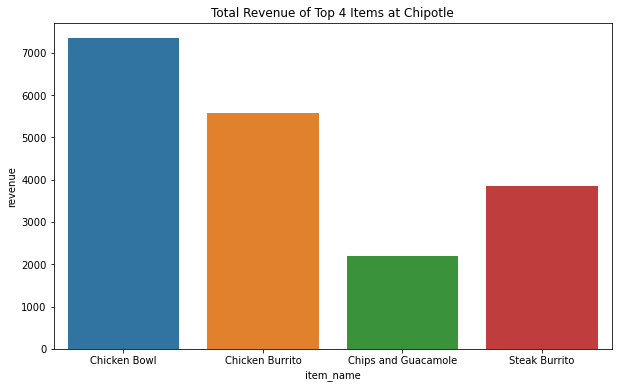

In [48]:
plt.figure(figsize = (10, 6))
sns.barplot(data = chipotle_popular_items, x = 'item_name', y = 'revenue')
plt.title('Total Revenue of Top 4 Items at Chipotle');

### 5
Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [49]:
sleepstudy = data('sleepstudy')
sleepstudy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


In [50]:
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [51]:
data('sleepstudy', show_doc = True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [60]:
averages = pd.DataFrame(sleepstudy.groupby('Days').Reaction.mean())
averages['Subject'] = 'Avg'
averages

,Reaction,Subject
Days,,
0,256.651806,Avg
1,264.495756,Avg
2,265.361900,Avg
3,282.992011,Avg
4,288.649422,Avg
5,308.518456,Avg
6,312.178256,Avg
7,318.750583,Avg
8,336.629506,Avg


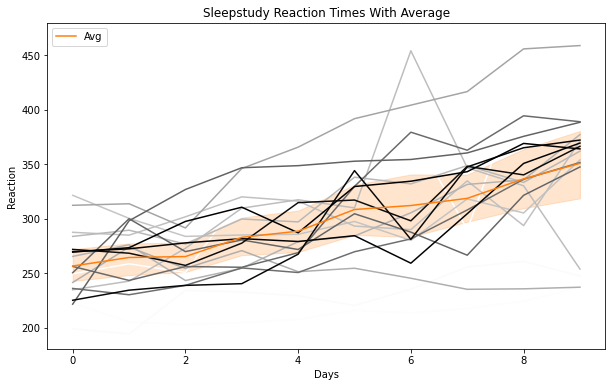

In [119]:
plt.figure(figsize = (10, 6))
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', hue = 'Subject', palette = 'Greys', legend = False)
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', label = 'Avg')
plt.title('Sleepstudy Reaction Times With Average');